In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### Load Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

In [16]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [14]:
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [15]:
sample.head()

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5


### EDA

In [4]:
duplicate_rows_data = train[train.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_data.shape)

Number of duplicate rows:  (0, 14)


In [5]:
desc = pd.DataFrame(index = list(train))
desc['count'] = train.count()
desc['nunique'] = train.nunique()
desc['%unique'] = desc['nunique'] / len(train) * 100
desc['null'] = train.isnull().sum()
desc['type'] = train.dtypes
desc = pd.concat([desc, train.describe().T.drop('count', axis = 1)], axis = 1)
desc

,count,nunique,%unique,null,type,mean,std,min,25%,50%,75%,max
id,165034,165034,100.000000,0,int64,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034,23221,14.070434,0,int64,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
Surname,165034,2797,1.694802,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,165034,457,0.276913,0,int64,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Geography,165034,3,0.001818,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,165034,2,0.001212,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,165034,71,0.043021,0,float64,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034,11,0.006665,0,int64,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034,30075,18.223518,0,float64,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034,4,0.002424,0,int64,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00


In [6]:
num_nan = train.isna().sum()
print("Number of nans: ", num_nan)

Number of nans:  id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


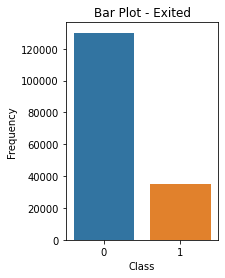

In [8]:
plt.subplot(1, 2, 1)
sns.countplot(data=train, x="Exited")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Bar Plot - Exited")
plt.show()

In [10]:
train.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

### Feature Engineering

In [12]:
def data_convert(df):
    # Define a mapping dictionary, Male is 0, Female is 1
    gender_mapping = {'Male': 0, 'Female': 1}
    df['Gender'] = df['Gender'].map(gender_mapping)
    
    # one-hot encode Geography
    df = pd.get_dummies(df, columns=['Geography'])
    
    # label encode the surnames
    label_encoder = LabelEncoder()
    df['Surname'] = label_encoder.fit_transform(df['Surname'])
    
    return df

In [18]:
def feat_engineering(df):
    df = data_convert(df)
    df = df.drop(columns = ['CustomerId'])
    
    return df

In [22]:
y = train['Exited']
X = train.drop(columns = ['Exited', 'id'])
X = X.drop_duplicates()

scaler = StandardScaler()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = feat_engineering(X_train)
X_val = feat_engineering(X_val)

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)

c:\users\jason nguyen\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [23]:
X_train

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,1.570003,0.277553,-0.879032,0.324586,1.416490,-0.884656,0.814086,0.571441,1.005415,-0.181454,0.867272,-0.515760,-0.529785
1,1.040214,0.802272,-0.879032,0.888299,1.416490,0.956961,0.814086,0.571441,-0.994614,-0.193591,0.867272,-0.515760,-0.529785
2,-0.006151,-1.321590,-0.879032,-0.351869,-0.007770,-0.884656,-1.014014,0.571441,-0.994614,0.849538,0.867272,-0.515760,-0.529785
3,-0.827918,1.077125,1.137614,-0.802839,-0.719900,0.035896,0.814086,0.571441,1.005415,-0.104529,-1.153041,-0.515760,1.887560
4,-0.012757,0.227580,-0.879032,-1.141067,-1.075965,-0.884656,0.814086,0.571441,-0.994614,0.426198,0.867272,-0.515760,-0.529785
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132022,-0.319268,0.140127,-0.879032,0.775556,0.348295,0.778986,-1.014014,0.571441,-0.994614,0.007911,-1.153041,1.938885,-0.529785
132023,-0.319268,1.177071,-0.879032,0.550071,0.704360,-0.884656,0.814086,0.571441,-0.994614,-0.473737,0.867272,-0.515760,-0.529785
132024,1.161762,1.202058,1.137614,0.099101,0.704360,-0.884656,0.814086,0.571441,-0.994614,1.099742,0.867272,-0.515760,-0.529785
132025,-1.738203,0.352513,1.137614,1.113784,-0.363835,-0.884656,0.814086,0.571441,1.005415,-1.744093,0.867272,-0.515760,-0.529785


### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
import time

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

modelLR = LogisticRegression(random_state = 42, max_iter = 300, n_jobs = -1)

paramsLR = {
    'C': [1e-4, 1e-2, 1, 3, 5, 10, 20],}


    
grid_searchLR = GridSearchCV(modelLR, param_grid=paramsLR, 
                                   n_jobs=-1, cv=skf.split(X_train,y_train), verbose=3,
                                    return_train_score = True)

start = time.time()
grid_searchLR.fit(X_train, y_train)
end = time.time()
print(end - start)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
6.525777578353882


In [26]:
print("Best Hyperparameters:", grid_searchLR.best_params_)

Best Hyperparameters: {'C': 1}


In [32]:
from sklearn.metrics import accuracy_score
# Get the best logistic regression model
LR = grid_searchLR.best_estimator_

# Evaluate the best model on the test set
y_pred = LR.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Test Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Test Accuracy: 0.8356409246523465
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     26052
           1       0.70      0.39      0.50      6955

    accuracy                           0.84     33007
   macro avg       0.78      0.67      0.70     33007
weighted avg       0.82      0.84      0.82     33007



### RFC

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(min_samples_split = 10, min_samples_leaf = 1, max_features = 3,
                             max_depth = None, class_weight =  'balanced')

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("Test Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Test Accuracy: 0.854697488411549
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     26052
           1       0.66      0.65      0.65      6955

    accuracy                           0.85     33007
   macro avg       0.78      0.78      0.78     33007
weighted avg       0.85      0.85      0.85     33007



### XGBoost

In [37]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("Test Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

[20:34:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\jason nguyen\appdata\local\programs\python\python36\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Test Accuracy: 0.8650892234980458
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26052
           1       0.74      0.55      0.63      6955

    accuracy                           0.87     33007
   macro avg       0.82      0.75      0.77     33007
weighted avg       0.86      0.87      0.86     33007



### Submission

In [38]:
ids = test['id']
test = test.drop(['id'], axis=1)
test = feat_engineering(test)

test = pd.DataFrame(scaler.transform(test), columns=test.columns)

In [40]:
test_pred = xgb.predict(test)
test_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
submit = pd.DataFrame(ids, columns = ['id'])

submit['Exited'] = test_pred

submit.head()

,id,Exited
0,165034,0
1,165035,1
2,165036,0
3,165037,0
4,165038,0


In [42]:
submit.to_csv('submission.csv', index=False)